In [1]:
from __future__ import division
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import torch
import cv2
from utils.Dataset import get_xray_dataloader
from utils.UNetTransforms import ContrastAdjustment, Normalize
from skimage import img_as_uint

In [4]:
dataloader = get_xray_dataloader(open(".\\datasources\\cross_validation_set.pt", "rb"), transforms=[Normalize()])

In [2]:
import cv2
import matplotlib
import numpy as np
def get_contour_image(landmarks):
    label = np.zeros((512,512), dtype=np.uint8)
    path = matplotlib.path.Path(landmarks).interpolated(15).vertices.astype(np.int)
    label[path[:,1], path[:,0]] = 255
    return label

In [4]:
import glob
mode = "test"
train_images = glob.glob(".\\images_cropped\\"+mode+"\\*")
for train_image in train_images:
    id = train_image.split("\\")[3].split(".")[0]
    landmarks_file = ".\\landmarks_cropped\\"+mode+"\\"+str(id)+".txt"
    filepath = ".\\labels\\"+mode+"\\"+str(id)+".npy"
    landmarks = np.loadtxt(landmarks_file)
    label_img = get_contour_image(landmarks)
    np.save(filepath, label_img)

In [3]:
import pickle
cross_validation_set_1 = pickle.load(open(".\\datasources\\cross_validation_set_1.pt", "rb"))
print(cross_validation_set_1)

{'trainingset': {'images': ['.\\images_cropped\\train\\0.jpg', '.\\images_cropped\\train\\1.jpg', '.\\images_cropped\\train\\2.jpg', '.\\images_cropped\\train\\3.jpg', '.\\images_cropped\\train\\4.jpg', '.\\images_cropped\\train\\5.jpg', '.\\images_cropped\\train\\6.jpg', '.\\images_cropped\\train\\7.jpg', '.\\images_cropped\\train\\8.jpg', '.\\images_cropped\\train\\9.jpg', '.\\images_cropped\\train\\10.jpg', '.\\images_cropped\\train\\11.jpg', '.\\images_cropped\\train\\12.jpg', '.\\images_cropped\\train\\13.jpg', '.\\images_cropped\\train\\14.jpg', '.\\images_cropped\\train\\15.jpg', '.\\images_cropped\\train\\16.jpg', '.\\images_cropped\\train\\17.jpg', '.\\images_cropped\\train\\18.jpg', '.\\images_cropped\\train\\19.jpg', '.\\images_cropped\\train\\20.jpg', '.\\images_cropped\\train\\21.jpg', '.\\images_cropped\\train\\22.jpg', '.\\images_cropped\\train\\23.jpg', '.\\images_cropped\\train\\24.jpg', '.\\images_cropped\\train\\25.jpg', '.\\images_cropped\\train\\26.jpg', '.\\images

In [8]:
pts = [(1,3), (4,5), (4,5)]
np.array(pts)[:,1]

array([3, 5, 5])

1.0 0.0 0.0 1.0 0.5001391 0.4026512


<IPython.core.display.Javascript object>


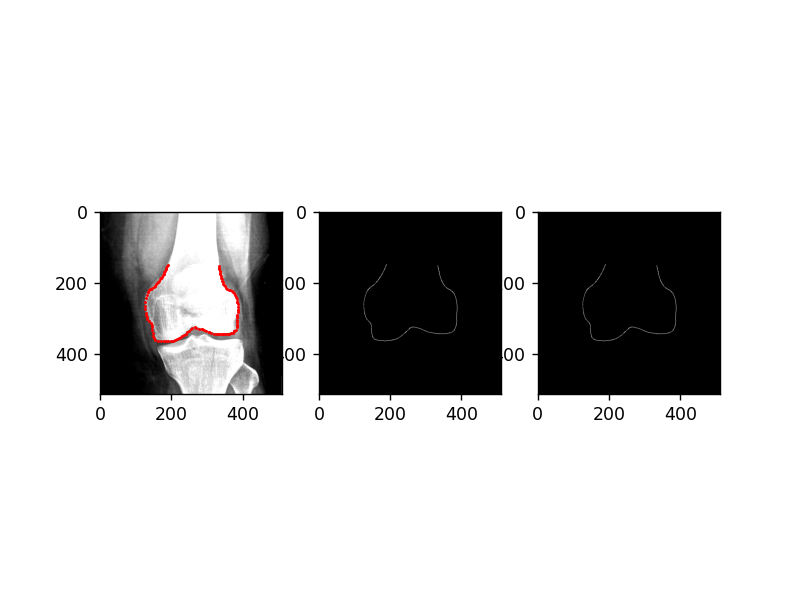

In [14]:
sample = next(iter(dataloader["trainloader"]))
image, landmarks, label = sample["image"].squeeze_(dim=0).detach().numpy(), sample["landmarks"].squeeze_(dim=0).detach().numpy(), sample["label"].squeeze_(0).detach().numpy()


label_new = np.zeros_like(image, dtype=np.uint8)

# get x and y vectors


import matplotlib 

path = matplotlib.path.Path(landmarks).interpolated(8).vertices.astype(np.int)
#path = path.astype(np.int)
#for xy in path:
    #cv2.circle(label, (xy[0],xy[1]), 0, thickness=0, color=255)
label_new[path[:,1], path[:,0]] = 255

print(label.max(), label.min(), image.min(), image.max(), image.mean(), image.std())
for i in range(512):
    for j in range(512):
        if 0 < label[i,j] < 1.0:
            print(True)
#print(path.shape)
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.imshow(image, "gray")
ax1.scatter(landmarks[:,0], landmarks[:,1], s=0.5, color="red")
#ax2.scatter(path[:, 0], path[:,1], s=0.5, color="blue")
ax2.imshow(label, "gray")
#ax2.scatter(path[:,0], path[:,1], s=1)
ax3.imshow(label_new, "gray")
plt.show()


In [3]:
import cv2
import matplotlib 
def get_contour_image(landmarks):
    label = np.zeros((512,512), dtype=np.uint8)
    path = matplotlib.path.Path(landmarks).interpolated(5).vertices.astype(np.int)
    label[path[:,1], path[:,0]] = 255
    return label

In [4]:
import pickle
cross_validation_set = pickle.load(open(".\\datasources\\cross_validation_set.pt", "rb"))

In [5]:
trainingset, testingset = cross_validation_set["trainingset"], cross_validation_set["testingset"]
trainingset["labels"] = []
for id in range(len(trainingset["landmarks"])):
    landmarks = np.loadtxt(trainingset["landmarks"][id])
    label_img = get_contour_image(landmarks)
    filepath = ".\\contours\\train\\"+str(id)+".npy"
    np.save(filepath, label_img)
    trainingset["labels"].append(filepath)

In [6]:
testingset["labels"] = []
for id in range(len(testingset["landmarks"])):
    landmarks = np.loadtxt(testingset["landmarks"][id])
    label_img = get_contour_image(landmarks)
    filepath = ".\\contours\\test\\"+str(id)+".npy"
    np.save(filepath, label_img)
    #cv2.imwrite(filepath, label_img)
    testingset["labels"].append(filepath)

In [64]:
cross_validation_set = {"trainingset":trainingset, "testingset":testingset}

In [67]:
pickle.dump(cross_validation_set, open(".\\datasources\\cross_validation_set_unet.pt", "wb"))

In [7]:
import pickle
cross_validation_set = pickle.load(open(".\\datasources\\cross_validation_set_unet.pt", "rb"))
trainingset, testingset = cross_validation_set["trainingset"], cross_validation_set["testingset"]

In [7]:
testingset = {"images":testingset["images"][:-20], "landmarks":testingset["landmarks"][:-20], "labels":testingset["labels"][:-20]}

In [8]:
cross_validation_set["trainingset"], cross_validation_set["testingset"] = trainingset, testingset
pickle.dump(cross_validation_set, open(".\\datasources\\cross_validation_set_unet.pt", "wb"))

In [21]:
cross_validation_set

{'trainingset': {'images': ['.\\images_cropped\\train\\0.jpg',
   '.\\images_cropped\\train\\105.jpg',
   '.\\images_cropped\\train\\106.jpg',
   '.\\images_cropped\\train\\107.jpg',
   '.\\images_cropped\\train\\108.jpg',
   '.\\images_cropped\\train\\109.jpg',
   '.\\images_cropped\\train\\1.jpg',
   '.\\images_cropped\\train\\122.jpg',
   '.\\images_cropped\\train\\123.jpg',
   '.\\images_cropped\\train\\124.jpg',
   '.\\images_cropped\\train\\125.jpg',
   '.\\images_cropped\\train\\126.jpg',
   '.\\images_cropped\\train\\2.jpg',
   '.\\images_cropped\\train\\139.jpg',
   '.\\images_cropped\\train\\140.jpg',
   '.\\images_cropped\\train\\141.jpg',
   '.\\images_cropped\\train\\142.jpg',
   '.\\images_cropped\\train\\143.jpg',
   '.\\images_cropped\\train\\3.jpg',
   '.\\images_cropped\\train\\156.jpg',
   '.\\images_cropped\\train\\157.jpg',
   '.\\images_cropped\\train\\158.jpg',
   '.\\images_cropped\\train\\159.jpg',
   '.\\images_cropped\\train\\160.jpg',
   '.\\images_cropped\\

In [11]:
import glob
images_files = glob.glob(".\\images_cropped\\unseen\\*")
images_files

['.\\images_cropped\\unseen\\100.jpg',
 '.\\images_cropped\\unseen\\101.jpg',
 '.\\images_cropped\\unseen\\102.jpg',
 '.\\images_cropped\\unseen\\103.jpg',
 '.\\images_cropped\\unseen\\104.jpg',
 '.\\images_cropped\\unseen\\905.jpg',
 '.\\images_cropped\\unseen\\906.jpg',
 '.\\images_cropped\\unseen\\907.jpg',
 '.\\images_cropped\\unseen\\913.jpg',
 '.\\images_cropped\\unseen\\914.jpg',
 '.\\images_cropped\\unseen\\915.jpg',
 '.\\images_cropped\\unseen\\921.jpg',
 '.\\images_cropped\\unseen\\922.jpg',
 '.\\images_cropped\\unseen\\923.jpg',
 '.\\images_cropped\\unseen\\929.jpg',
 '.\\images_cropped\\unseen\\930.jpg',
 '.\\images_cropped\\unseen\\931.jpg',
 '.\\images_cropped\\unseen\\937.jpg',
 '.\\images_cropped\\unseen\\938.jpg',
 '.\\images_cropped\\unseen\\939.jpg']

In [13]:
unseen_dataset = {"images":[], "landmarks":[]}
for image_file in images_files:
    id = image_file.split("\\")[3].split(".")[0]
    filepath_image = image_file
    filepath_landmarks = ".\\landmarks_cropped\\unseen\\"+str(id)+".txt"
    unseen_dataset["images"].append(filepath_image)
    unseen_dataset["landmarks"].append(filepath_landmarks)
unseen_dataset

{'images': ['.\\images_cropped\\unseen\\100.jpg',
  '.\\images_cropped\\unseen\\101.jpg',
  '.\\images_cropped\\unseen\\102.jpg',
  '.\\images_cropped\\unseen\\103.jpg',
  '.\\images_cropped\\unseen\\104.jpg',
  '.\\images_cropped\\unseen\\905.jpg',
  '.\\images_cropped\\unseen\\906.jpg',
  '.\\images_cropped\\unseen\\907.jpg',
  '.\\images_cropped\\unseen\\913.jpg',
  '.\\images_cropped\\unseen\\914.jpg',
  '.\\images_cropped\\unseen\\915.jpg',
  '.\\images_cropped\\unseen\\921.jpg',
  '.\\images_cropped\\unseen\\922.jpg',
  '.\\images_cropped\\unseen\\923.jpg',
  '.\\images_cropped\\unseen\\929.jpg',
  '.\\images_cropped\\unseen\\930.jpg',
  '.\\images_cropped\\unseen\\931.jpg',
  '.\\images_cropped\\unseen\\937.jpg',
  '.\\images_cropped\\unseen\\938.jpg',
  '.\\images_cropped\\unseen\\939.jpg'],
 'landmarks': ['.\\landmarks_cropped\\unseen\\100.txt',
  '.\\landmarks_cropped\\unseen\\101.txt',
  '.\\landmarks_cropped\\unseen\\102.txt',
  '.\\landmarks_cropped\\unseen\\103.txt',
  '.

In [14]:
cross_validation_set = pickle.load(open(".\\datasources\\cross_validation_set_unet.pt", "rb"))
cross_validation_set["unseendataset"] = unseen_dataset
pickle.dump(cross_validation_set, open(".\\datasources\\cross_validation_set_unet.pt", "wb"))